<div class="header">
  <h1>First we will import the libraries</h1>
</div>

<div>At first, we will import <b>Numpy</b> as we know that it is the fundamental package for scientific computing in Python. And also for different mathematical terms like multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more we need it.</div>

In [1]:
import numpy as np 

<div>As we are working here with a lots of data. So we need a powerfull tool which tool can handle this data for data analysis and do some stuffs like data cleansing, data fill, data normalization, data merge and joins and much more. And for this types of work we will import <b>Pandas</b> now.</div>

In [2]:
import pandas as pd

<div>In a dataset maybe there is some missing data available. So handle those missing data we will use missingno library.</div>

In [3]:
import missingno as msno

<div>Now we will use some library by which we can visualize our dataset, we can draw some graphical representation for our datasets, we can genarate a visual data plot for our data. And for this kinds of works now will import these following librarys.</div>

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

<div class="header">
  <h1>Loading the data</h1>
</div>

<div>Now we will work with our dataset. We will load our data, we will use <b>DataFrame</b> (which is defined as <b>df</b> in python) here for some different purposes and some other things also.</div>

In [5]:
df=pd.read_csv("C:/Users/Ferdous/Downloads/archive/heart.csv")
df1=pd.read_csv("C:/Users/Ferdous/Downloads/archive/o2Saturation.csv")
df.head()
df1.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [6]:
df1.rename(columns={"98.6": "Saturasyon"}, inplace=True)

In [7]:
data = pd.concat([df,df1], axis=1)

In [8]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturasyon
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5


In [9]:
data.isnull().sum()

age           3282
sex           3282
cp            3282
trtbps        3282
chol          3282
fbs           3282
restecg       3282
thalachh      3282
exng          3282
oldpeak       3282
slp           3282
caa           3282
thall         3282
output        3282
Saturasyon       0
dtype: int64

In [10]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturasyon
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,3585.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,98.239275
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.726336
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.600000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,98.600000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,98.600000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,99.600000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    float64
 1   sex         303 non-null    float64
 2   cp          303 non-null    float64
 3   trtbps      303 non-null    float64
 4   chol        303 non-null    float64
 5   fbs         303 non-null    float64
 6   restecg     303 non-null    float64
 7   thalachh    303 non-null    float64
 8   exng        303 non-null    float64
 9   oldpeak     303 non-null    float64
 10  slp         303 non-null    float64
 11  caa         303 non-null    float64
 12  thall       303 non-null    float64
 13  output      303 non-null    float64
 14  Saturasyon  3585 non-null   float64
dtypes: float64(15)
memory usage: 448.1 KB


In [12]:
data.shape

(3585, 15)

In [13]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'Saturasyon'],
      dtype='object')

<div>Here, we already done some basic things with our data such as we load it,then we see some head of data, we check that there is any null data available or not, we check the data shape, we check the columns and so on. </div>

<div class="header">
  <h1>Exploratory Data Analysis</h1>
    
<p>And now we will see some graphical representation to visualize our data. So that we can get a very clear idea about our datasets.</p>
</div>


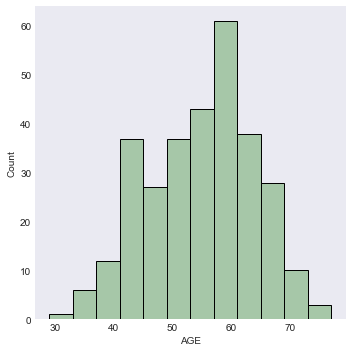

In [14]:
sns.displot(data=data, x="age", color="#8FBC8F")
plt.xlabel("AGE")
plt.show()

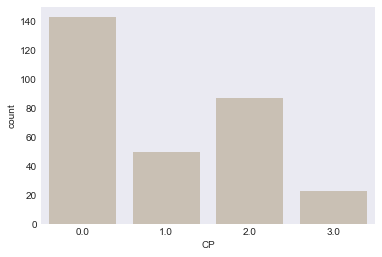

In [15]:
sns.countplot(data=data, x="cp", color="#CDC0B0")
plt.xlabel("CP")
plt.show()

<div class="header">
  <h1>CP : Chest Pain</h1>
  <h2>As we can see in the graph here is 4 different types of chest pain.<br></h2>
    <h3>  (0.0) : Type 1 :- Typical Angina<br>
 <br>     (1.0) : Type 2 :- Atypical Angina<br>
   <br>   (2.0) : Type 3 :- Non-Anginal Pain<br>
     <br> (3.0) : Type 4 :- Asymptomatic<br>
    </h3>
</div>

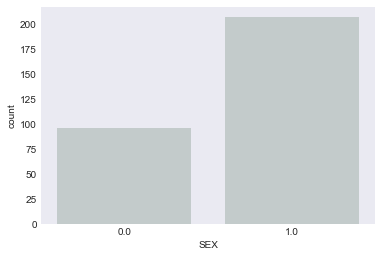

In [16]:
sns.countplot(data=data, x="sex", color="#C1CDCD")
plt.xlabel("SEX")
plt.show()

<div class="header">
  <h1>Sex</h1> <br>
    <h2> 0.0 = Female <br><br> 1.0 = Male </h2> <br>

</div>

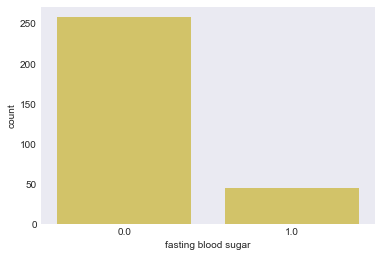

In [17]:
sns.countplot(data=data, x="fbs", color="#E3CF57")
plt.xlabel("fasting blood sugar")
plt.show()

<div class="header">
  <h1>fbs : Fasting Blood Sugar</h1>
    <h2>(fbs > 120 mg/dl) (1 = true; 0 = false)</h2>
</div>

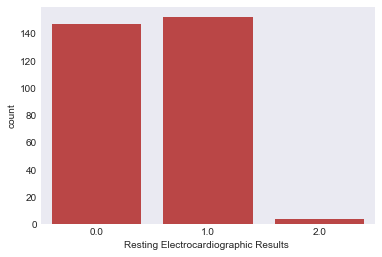

In [18]:
sns.countplot(data=data, x="restecg", color="#CD3333")
plt.xlabel("Resting Electrocardiographic Results ")
plt.show()

<div class="header">
  <h1>rest_ecg : Resting Electrocardiographic Results</h1> <br>
  <h2>Value 0.0 = normal <br><br>
      Value 1.0 = Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br><br>
      Value 2.0 = Showing probable or definite left ventricular hypertrophy by Estes' criteria
    </h2>
</div>

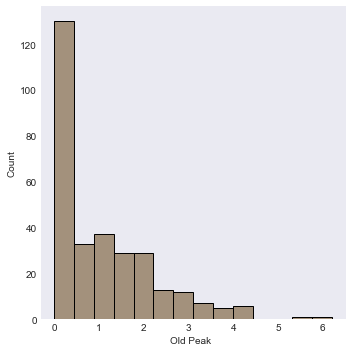

In [19]:
sns.displot(data=data, x="oldpeak", color="#8B7355")
plt.xlabel("Old Peak  ")
plt.show()

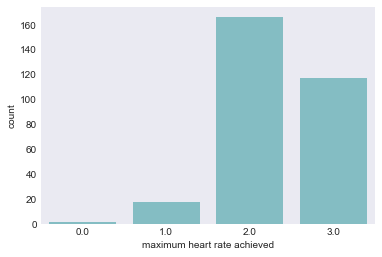

In [20]:
sns.countplot(data=data, x="thall", color="#7AC5CD")
plt.xlabel("maximum heart rate achieved")
plt.show()

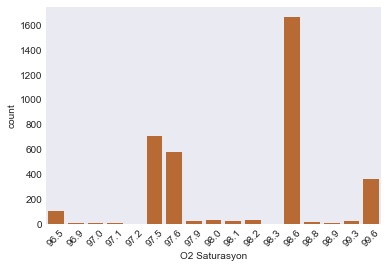

In [21]:
sns.countplot(data=data, x="Saturasyon", color="#CD661D")
plt.xticks(rotation=45)
plt.xlabel("O2 Saturasyon")
plt.show()

In [22]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturasyon
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5


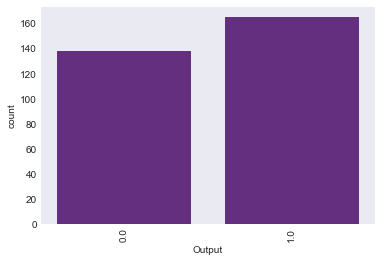

In [23]:
sns.countplot(data=data, x="output", color="#68228B")
plt.xticks(rotation=90)
plt.xlabel("Output")
plt.show()

<div>As we see that, we have already analys our data. So now we will start our prediction.</div>

<div class="header">
  <h1>Prediction</h1>
  <p>we will use some machine learning tools to predict our result.</p>
</div>

In [24]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [25]:
data_len=len(data)

In [26]:
data_len

3585

In [27]:
test=data[:data_len]
test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturasyon
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6


<div>Here, we can see that we have total 3585 rows and 15 columns. And we can also see that in some places there is written <b>NaN</b> which means <b>Not a Number</b> or we can say that the value is missing.</div>

In [28]:
data = data[np.isfinite(data).all(1)]

In [29]:
X_train = data.drop(labels = "output", axis = 1)
y_train = data["output"]

In [30]:
y_train = data["output"]
y_train

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
298    0.0
299    0.0
300    0.0
301    0.0
302    0.0
Name: output, Length: 303, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)

In [32]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 203
X_test 100
y_train 203
y_test 100
test 3585


In [33]:
logreg = LogisticRegression(max_iter=4000)

In [34]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [35]:
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 89.16
Testing Accuracy: % 80.0


In [36]:
random_state=42

classifier=[DecisionTreeClassifier(random_state=random_state),
           SVC(random_state=random_state),
           RandomForestClassifier(random_state=random_state),
           LogisticRegression(random_state=random_state,solver='lbfgs', max_iter=4000),
           KNeighborsClassifier()]

In [37]:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(1,3,5),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [38]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.7785714285714286
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.659047619047619
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8666666666666666
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Ferdous\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ferdous\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ferdous\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ferdous\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueEr

0.8519047619047619
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.6738095238095239


<div class="header">
  <h1>Error</h1>
  <p>Ops, we have an error here. The reason of this error is the NaN values and we already know that we have some NaN values in our dataset.</p>
</div>


In [39]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<div>For different seaborn version maybe we can get a future warning in our final result. To avoid that future warning, here we import this library.</div>

<div class="header">
  <h1>Result</h1>
  <p>Now we will see the result in a graphical representation for different methods.</p>
</div>

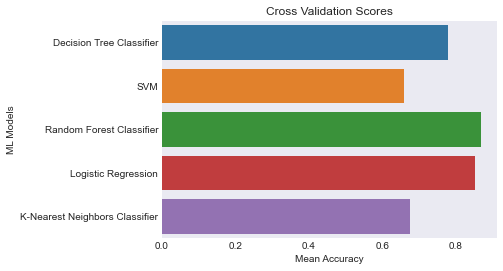

In [40]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["Decision Tree Classifier", "SVM","Random Forest Classifier",
             "Logistic Regression",
             "K-Nearest Neighbors Classifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()